In [ ]:
source("/Users/miles/Documents/Projects/projects_2025/R_sandbox/startup_r.R")
startup_r()
library(rstan)
library(BH)
library(posterior)
library(bayesplot)


Startup complete: common libraries loaded!



In [11]:
gp_model <- "
  data {
    int<lower = 0> Y[2];
  }
  parameters {
    real<lower = 0> lambda;
  }
  model {
    Y ~ poisson(lambda);
    lambda ~ gamma(3, 1);
  }
"



# STEP 2: SIMULATE thea posterior
gp_sim <- stan(
  model_code = gp_model, data = list(Y = c(2, 8)),
  chains = 4, iter = 5000 * 2, seed = 84735
)



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.022 seconds (Warm-up)
Chain 1:                0.023 seconds (Sampling)
Chain 1:         

In [14]:
posterior_draws <- as_draws_df(gp_sim)
head(posterior_draws)


lambda,lp__,.chain,.iteration,.draw
<dbl>,<dbl>,<int>,<int>,<int>
3.612115,5.859470,1,1,1
3.611833,5.859301,1,2,2
4.112178,6.044853,1,3,3
4.003809,6.022773,1,4,4
2.742083,4.887082,1,5,5
4.110857,6.044639,1,6,6


NULL

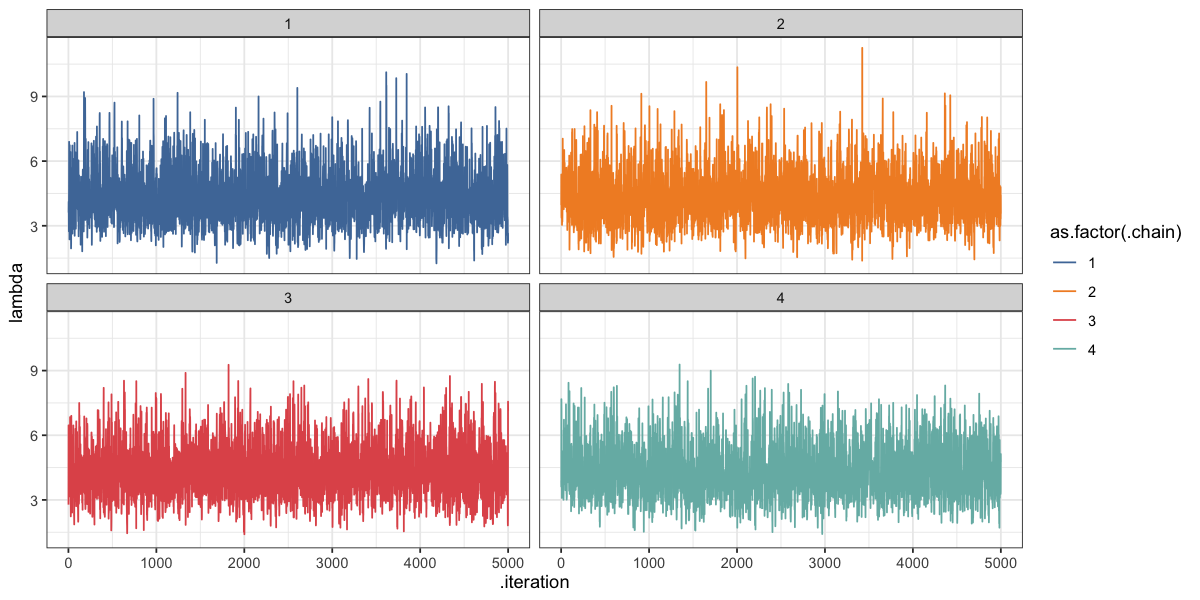

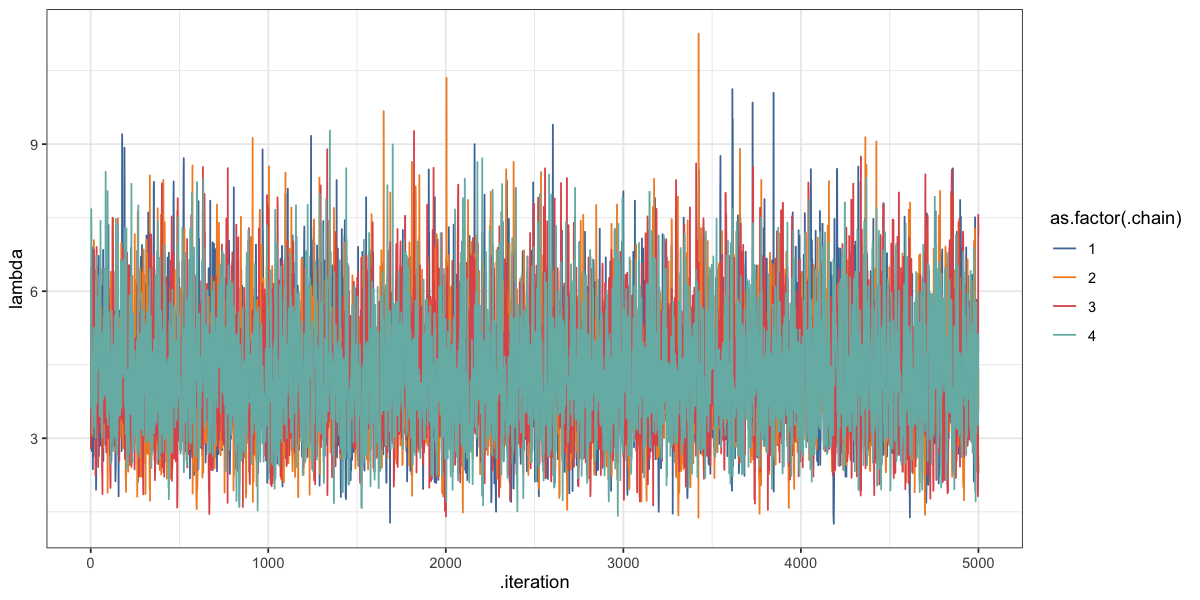

In [15]:
# trace plots of lambda

fig.size(5, 10)
ggplot(posterior_draws, aes(x = .iteration, y = lambda, col = as.factor(.chain))) +
    geom_line() +
    theme_bw() +
    scale_color_tableau(palette = "Tableau 10") +
    facet_wrap(~.chain)

ggplot(posterior_draws, aes(x = .iteration, y = lambda, col = as.factor(.chain))) +
    geom_line() +
    theme_bw() +
    scale_color_tableau(palette = "Tableau 10") #+
# facet_wrap(~.chain)


## Next we want to look at the histograms /density plot vs the theoretical distirubtion

NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


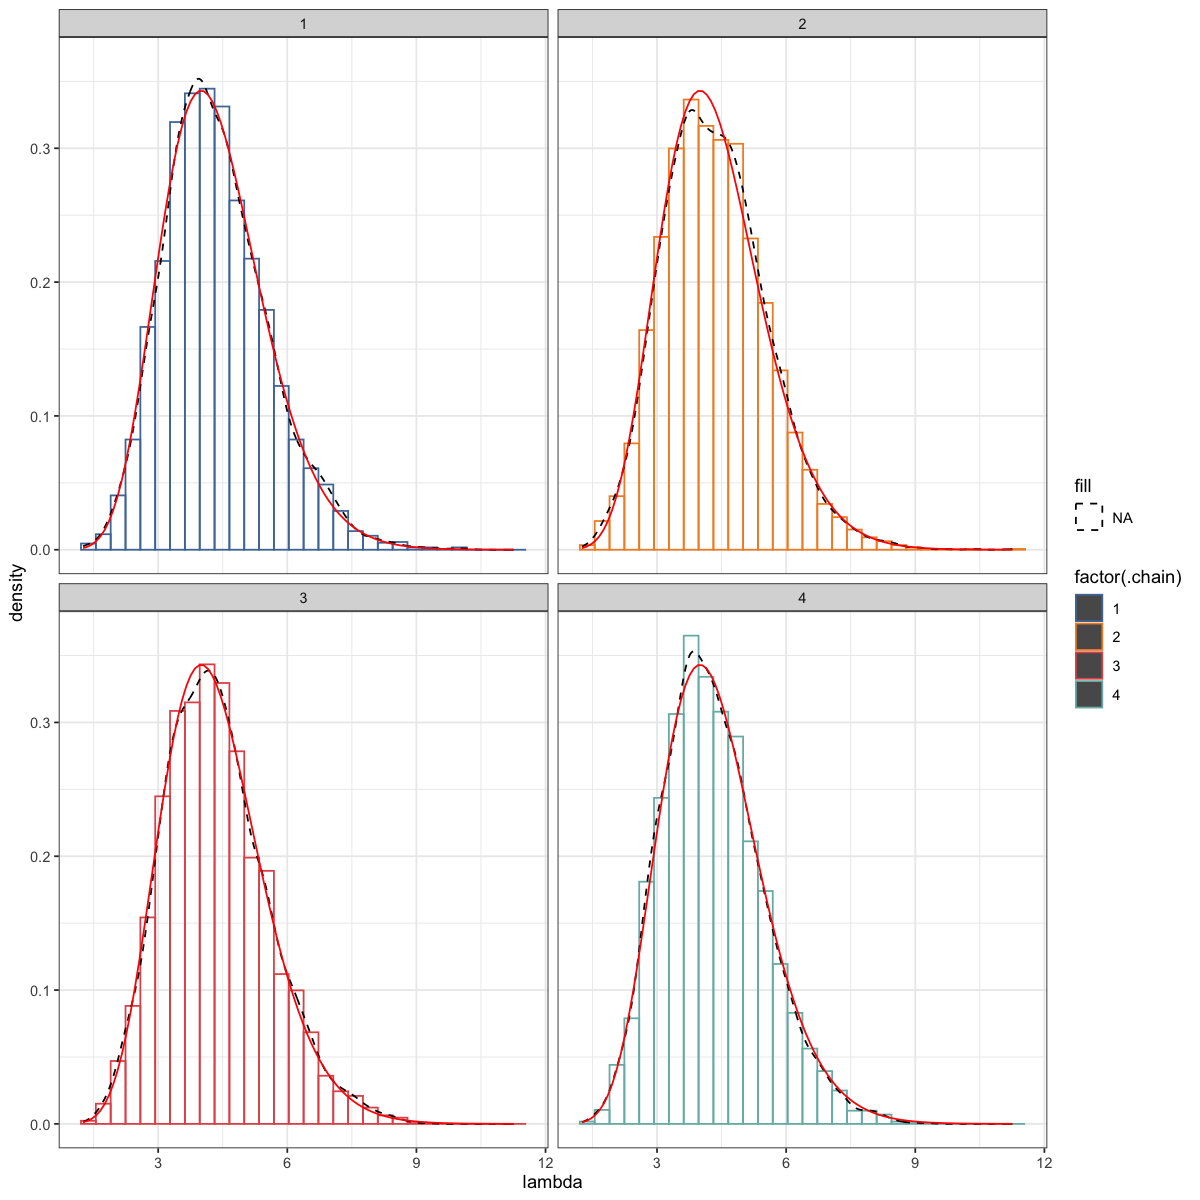

In [28]:
# posterior distirubtion of lambda in gamma possion should be gamma(a+(8+2), b + (2))
fig.size(10, 10)
posterior_draws %>%
    ggplot(aes(x = lambda, col = factor(.chain), fill = NA)) +
    geom_histogram(aes(y = after_stat(density))) +
    geom_density(linetype = "dashed", col = "black") +
    stat_function(
        fun = dgamma,
        args = list(shape = 13, rate = 3),
        color = "red"
    ) +
    facet_wrap(~.chain) +
    theme_bw() +
    scale_color_tableau(palette = "Tableau 10") +
    scale_fill_tableau(palette = "Tableau 10")


NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


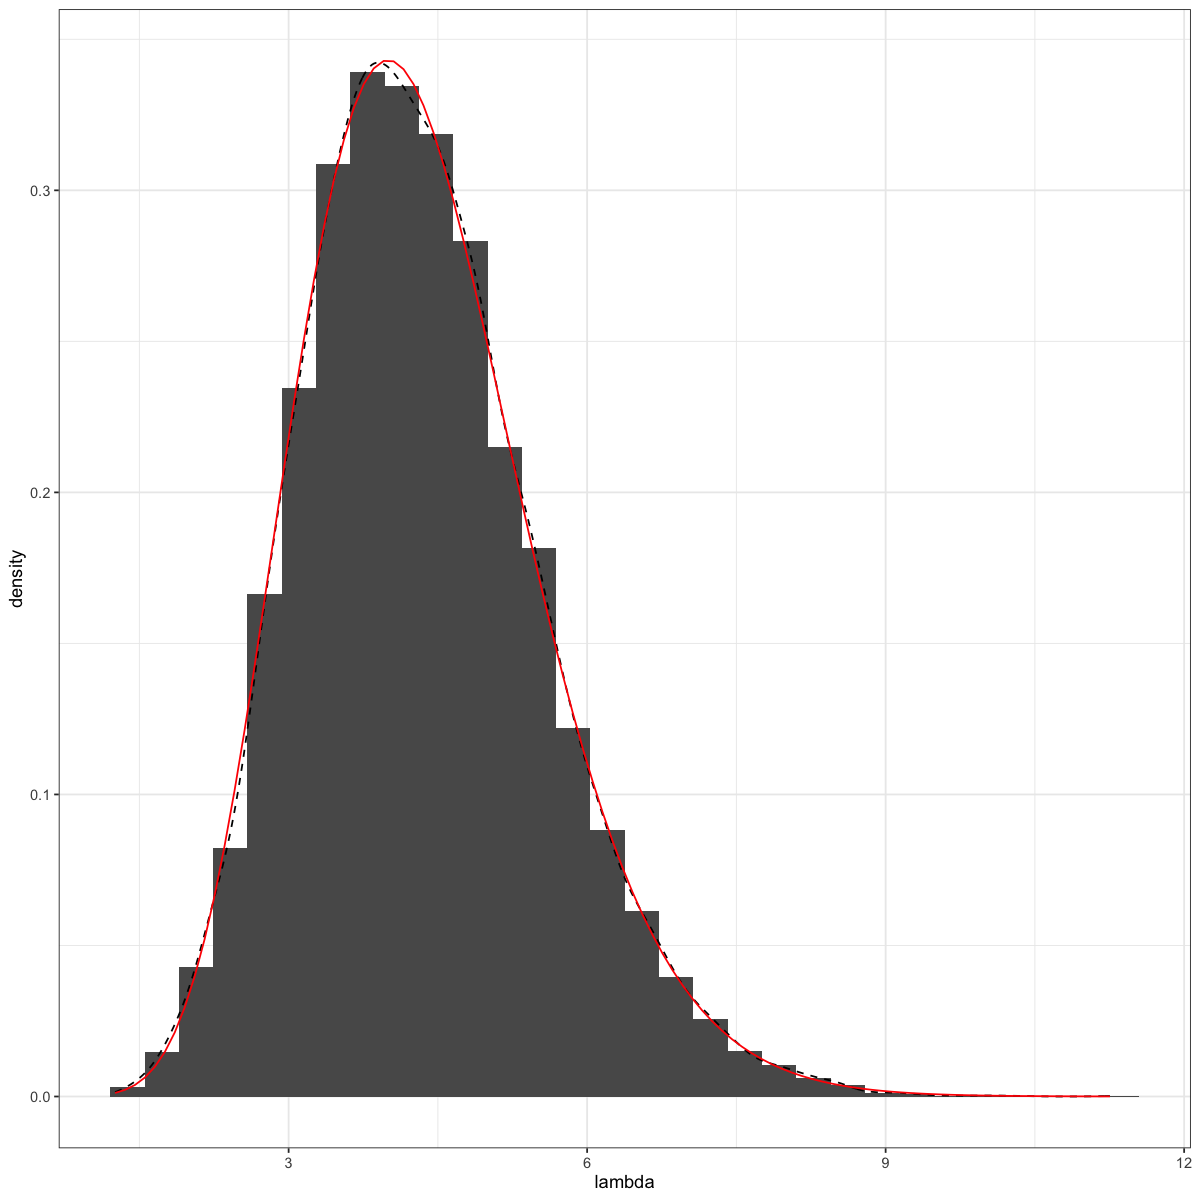

In [29]:
# posterior distirubtion of lambda in gamma possion should be gamma(3+(8+2), 1 + (2))
fig.size(10, 10)
posterior_draws %>%
    ggplot(aes(x = lambda)) +
    geom_histogram(aes(y = after_stat(density))) +
    geom_density(linetype = "dashed", col = "black") +
    stat_function(
        fun = dgamma,
        args = list(shape = 13, rate = 3),
        color = "red"
    ) +
    # facet_wrap(~.chain) +
    theme_bw() +
    scale_color_tableau(palette = "Tableau 10") +
    scale_fill_tableau(palette = "Tableau 10")


In [ ]:
neff_ratio(gp_sim, pars = "lambda")

# our sample is equivalent to 0.378 * 20,000 independent samples from the true posterior


[1] 0.3783295

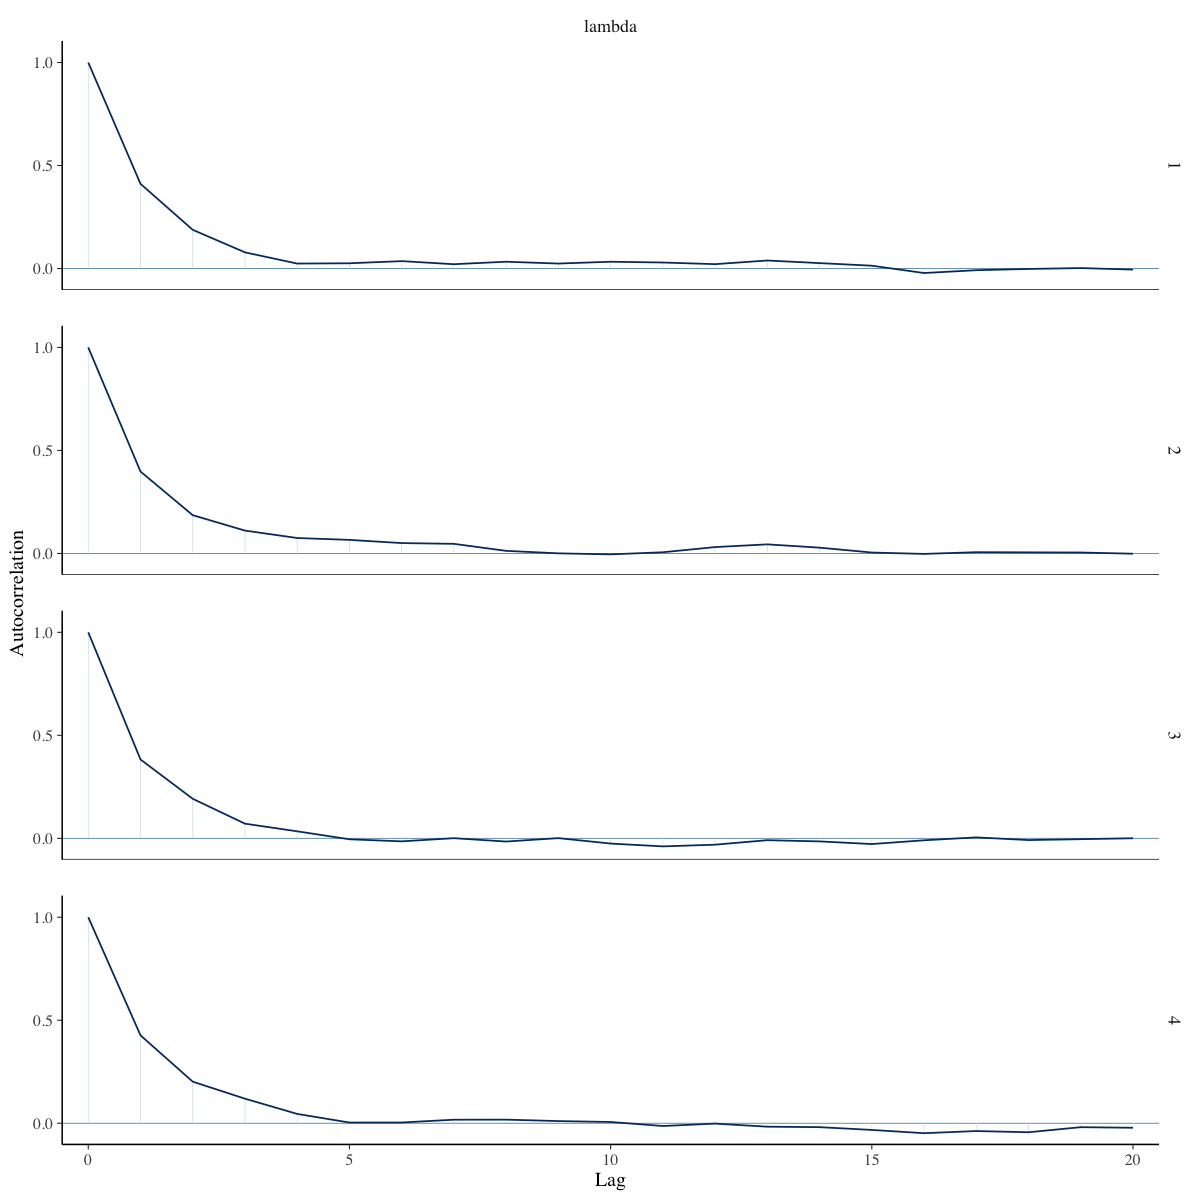

In [ ]:
mcmc_acf(gp_sim, pars = "lambda")
# lag describes the correlation between sample n and sample n-lag. these values should decay quickly

In [ ]:
rhat(gp_sim, pars = "lambda")
# rhat describes the ratio of combined varianve across chains/average variance within each chain.
# should be close to 1 if stable. >1.05 suggests low stability

[1] 1.000189